## Various Imports

In [1]:
import os
import sys
import shutil
import numpy as np
from collections import Counter

# third-party packages
import pandas as pd
import numpy as np
from PIL import Image
from scipy.spatial import distance

import matplotlib.pyplot as plt 
%matplotlib inline

import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras import backend as K

print(f"Current data format {K.image_data_format()}")
K.set_image_data_format('channels_last')
print(f"New data format {K.image_data_format()}")

from converter.xml_analyzer import parse_xml
from converter.xml_analyzer import get_conv_weights
from converter.xml_analyzer import get_affine_weights
from converter.xml_analyzer import count_number_of_layers

Current data format channels_last
New data format channels_last


In [2]:
# You may need to adjust these paths if you
# have not followed the instructions in README.md
# and have generated the files at different locations

REPO_PATH = os.curdir

# Adjust these as per your machines
PATH_TO_DLIB_XML_MODEL = os.path.join(REPO_PATH, 'xml_generator', "build/dlib_face_recognition_resnet_model_v1.xml")
PATH_TO_DLIB_H5_MODEL = os.path.join(REPO_PATH, "dlib_face_recognition_resnet_model_v1.h5")

TEST_IMAGE_FOLDER = os.path.join(REPO_PATH, "images")

# note - these images are already aligned using dlib and of size (150,150)
TEST_IMAGES = [
    "0001_01.png",  # class 1
    "0010_01.png",  # class 1
    "0096_01.png",  # class 2
    "0096_02.png",  # class 2
    "0096_04.png"   # class 2
]

PATH_TO_ALL_TEST_IMAGES = list(map(lambda x: os.path.join(TEST_IMAGE_FOLDER, x), TEST_IMAGES))

print(f"{TEST_IMAGE_FOLDER}")
print(f"{PATH_TO_DLIB_XML_MODEL}")
print(f"{PATH_TO_DLIB_H5_MODEL}")

# sanity tests that these paths do exist
assert os.path.exists(TEST_IMAGE_FOLDER)
assert os.path.exists(PATH_TO_DLIB_XML_MODEL)
assert os.path.exists(PATH_TO_DLIB_H5_MODEL)

./images
./xml_generator/build/dlib_face_recognition_resnet_model_v1.xml
./dlib_face_recognition_resnet_model_v1.h5


## Dlib's Model Analysis

In [3]:
# parse it
xml_model = parse_xml(PATH_TO_DLIB_XML_MODEL)

In [4]:
ln_vs_count = count_number_of_layers(xml_model)
conv_layers_info = get_conv_weights(xml_model)[::-1]
affine_layers_info = get_affine_weights(xml_model)[::-1]

Total number of layer entries - 132


In [5]:
# let pandas do it magic 
pd.DataFrame.from_dict(ln_vs_count, orient='index', columns=['Count'])

,Count
loss_metric,1
fc_no_bias,1
avg_pool,5
relu,29
add_prev,14
affine_con,29
con,29
max_pool,1
input_rgb_image,1


In [6]:
# Conv layers
pd.DataFrame(conv_layers_info)

,id,name,nc,nr,num_filters,sx,sy,total_weights,weights
0,130,conv_1,7,7,32,2,2,4736,"[-0.0293299202, -0.0188653059, -0.00566938985,..."
1,125,conv_2,3,3,32,1,1,9248,"[-0.0198807381, -0.0278012436, 0.00704712234, ..."
2,122,conv_3,3,3,32,1,1,9248,"[2.06610493e-05, -0.00611053547, -0.0030803154..."
3,117,conv_4,3,3,32,1,1,9248,"[-0.0184960347, 0.00806789286, 0.00271707121, ..."
4,114,conv_5,3,3,32,1,1,9248,"[-0.00948836561, -0.00907282066, 0.0125354007,..."
5,109,conv_6,3,3,32,1,1,9248,"[0.00616474077, 0.00430707354, -0.0156090874, ..."
6,106,conv_7,3,3,32,1,1,9248,"[0.00438096095, -0.0100570731, -0.00921011623,..."
7,101,conv_8,3,3,64,2,2,18496,"[-0.00449227169, 0.000273505109, 0.0122217648,..."
8,98,conv_9,3,3,64,1,1,36928,"[-0.00792279281, -0.00957604777, -0.0077794729..."
9,90,conv_10,3,3,64,1,1,36928,"[-0.0032715241, -0.0105726216, -0.0125644859, ..."


In [7]:
# Affine (scale) layers
pd.DataFrame(affine_layers_info)

,id,name,total_weights,weights
0,129,sc_1,64,"[12.1663227, 10.5592213, 17.4300499, 13.288585..."
1,124,sc_2,64,"[5.95501137, 5.37066984, 4.13563061, 6.4691848..."
2,121,sc_3,64,"[5.16520643, 10.5300217, 10.1555595, 9.2638483..."
3,116,sc_4,64,"[4.30762815, 4.81665754, 4.58528137, 4.8235268..."
4,113,sc_5,64,"[7.71606302, 13.1466589, 14.3001995, 10.426322..."
5,108,sc_6,64,"[3.27119374, 4.18873596, 3.24244237, 3.3145091..."
6,105,sc_7,64,"[8.37581635, 13.5131445, 17.2815819, 10.821703..."
7,100,sc_8,128,"[3.4770906, 3.43965483, 3.10719991, 3.43313265..."
8,97,sc_9,128,"[5.06062937, 6.16682053, 8.23571873, 4.0493001..."
9,89,sc_10,128,"[4.46614695, 4.8219943, 4.14754963, 3.99555492..."


## Probe image preparation

In [8]:
# Various utilities methods to load and pre-process images
def load_image(infilename) :
    img = Image.open(infilename )
    return img

def show_images(images, cols = 1):
    n_images = len(images)
    titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        plt.imshow(image)
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()
    
def convert_image_to_np(img):
    return np.asarray(img, dtype='float32')

def normalize_image(image):    
    [R,G,B] = np.dsplit(image,image.shape[-1])

    Rx = (R - 122.782) / 256.
    Gx = (G - 117.001) / 256.
    Bx = (B - 104.298) / 256.

    new_image = np.dstack((Rx,Gx,Bx))
    return new_image

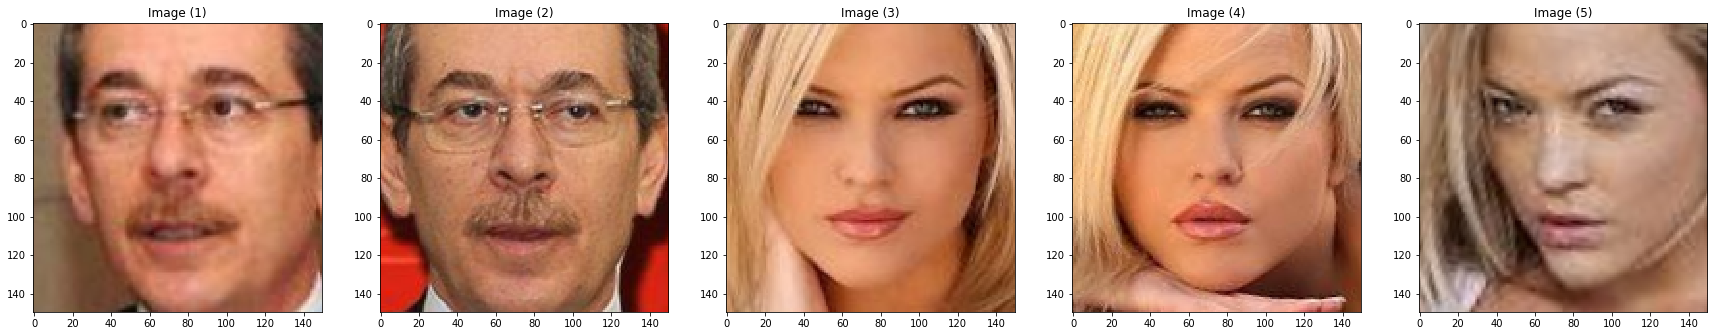

In [9]:
_test_images = list(map(load_image, PATH_TO_ALL_TEST_IMAGES))
show_images(_test_images, cols=1)

In [10]:
# convert the images to nump arrays
probe_images = list(map(convert_image_to_np, _test_images))

In [11]:
# normalize the images
normalized_probe_images = list(map(normalize_image, probe_images))
normalized_probe_images[0].shape

(150, 150, 3)

In [12]:
reshaped_probe_images = list(map(lambda x: np.reshape(x, (1,150,150,3)), normalized_probe_images))

## Inference using Keras Model

In [13]:
# first we need to load it
# now since we have custom layers we need to specify them

from converter.model import ScaleLayer, ReshapeLayer

model_from_file = tf.keras.models.load_model(PATH_TO_DLIB_H5_MODEL,
    custom_objects={'ScaleLayer': ScaleLayer, 'ReshapeLayer': ReshapeLayer})

model_from_file.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_image (InputLayer)        (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv_1 (Conv2D)                 (None, 72, 72, 32)   4736        input_image[0][0]                
__________________________________________________________________________________________________
sc_1 (ScaleLayer)               (None, 72, 72, 32)   64          conv_1[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 72, 72, 32)   0           sc_1[0][0]                       
__________________________________________________________________________________________________
max_poolin

### Moment of Truth :)

There are 5 test (probe) images, the first 2 belongs to class 1 and rest belongs to class 2.

The third image of the class 2 is a pose image and bit blurry as well so I do expect to see the distance between this 
image and the rest of the images to be larger than 0.6 for class 2.

In [15]:
# run the prediction on the normalized images
outputs = list(map(lambda x: model_from_file.predict(x, batch_size=1), reshaped_probe_images))

# the predict returns an array of predictions
# so here we are further destructuring it
(output1, output2, output3, output4, output5) = list(map(lambda x: x[0], outputs))


print(f"image1vs2 {distance.euclidean(output1, output2)}")
print(f"image2vs3 {distance.euclidean(output2, output3)}")
print(f"image3vs4 {distance.euclidean(output3, output4)}")
print(f"image3vs5 {distance.euclidean(output3, output5)}")
print(f"image4vs5 {distance.euclidean(output4, output5)}")

image1vs2 0.33883780241012573
image2vs3 0.9505220055580139
image3vs4 0.39037615060806274
image3vs5 0.522692859172821
image4vs5 0.5595120191574097
